<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-1/blob/main/Study/Study_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#3.6.8 ver 에서 진행되었습니다.
import sys
print("--sys.version- ")
print(sys.version)

--sys.version- 
3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


## 라이브러리 및 데이터 불러오기

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys, warnings
import seaborn as sns
if not sys.warnoptions: warnings.simplefilter("ignore")
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
pd.set_option('max_columns', 1040, 'max_rows', 140)

from google.colab import drive
drive.mount('/content/drive')

#사용할 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/ESAA/data/dacon/공공_데이터_활용_온도_추정_AI_경진대회/train.csv') 
test = pd.read_csv('/content/drive/MyDrive/ESAA/data/dacon/공공_데이터_활용_온도_추정_AI_경진대회/test.csv')
train.head(5)

Mounted at /content/drive


,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [3]:
submission = pd.read_csv('/content/drive/MyDrive/ESAA/data/dacon/공공_데이터_활용_온도_추정_AI_경진대회/sample_submission.csv') 

## 데이터 전처리

In [4]:
df_month = train[train.loc[:,'Y00':'Y17'].notnull().all(1)].drop(columns = 'Y18')
df_days = train[train['Y18'].notnull()].drop(train.loc[:,'Y00':'Y17'],axis=1)

trainX1, trainX2 = df_month, df_days

# Y18이 존재했던 마지막 3일을 기준으로 Y값 추정
trainX1['Y18'] = ((trainX1['Y06'] + trainX1['Y10'] + trainX1['Y12'])/3 + (trainX1['Y00'] + trainX1['Y10'] + trainX1['Y12'])/3)/ 2 #

trainX1 = trainX1.drop(columns = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08',
       'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17'])

train = pd.concat([trainX1,trainX2])

train['Y18'] = np.log1p(train['Y18']) # 스케일링

y_train = train['Y18']

data = pd.concat([train.drop(columns=['Y18']),test])

data.index = [i for i in range(len(data))]

기온=['X00', 'X07', 'X28', 'X31', 'X32']
현지기압=['X01', 'X06', 'X22', 'X27', 'X29']
풍속=['X02', 'X03', 'X18', 'X24', 'X26']
강수량=['X04', 'X10', 'X21', 'X36', 'X39']
해면기압=['X05', 'X08', 'X09', 'X23', 'X33']
일사량=['X11', 'X14', 'X16', 'X19', 'X34']
습도=['X12', 'X20', 'X30', 'X37', 'X38']
풍향=['X13', 'X15', 'X17', 'X25', 'X35']

lst = [기온,현지기압,풍속,강수량,해면기압,일사량,습도,풍향]
name_lst = ['기온','현지기압','풍속','강수량','해면기압','일사량','습도','풍향']

col_names = {}
for l,n in zip(lst, name_lst):
    for i in range(5):
        col_names[f'{l[i]}'] = f'{n}_{i+1}'

data.rename(columns = col_names,inplace=True)
train.rename(columns = col_names,inplace=True)
test.rename(columns = col_names,inplace=True)

## 변수 선택 및 모델 구축

### 시간 관련 특징 추가 - 시간 범주
- 시간을 범주화하여 해당 시간의 Y18 통계치 넣기

In [5]:
minute_data = (data.id%144).astype(int)

data['min'] = minute_data

# data['hour'] = pd.Series((data.index%144/6).astype(int))

train['min'] = (train.id%144).astype(int)

def f(x) : # 범주화를 위한 함수 생성 
    if x< 18 : 
        return('t1')
    elif x< 39 : 
        return('t2')
    elif x< 48 : 
        return('t3')
    elif x< 72 : 
        return('t4')
    elif x< 86 : 
        return('t5')
    elif x< 102 : 
        return('t6')
    elif x< 114 : 
        return('t7')
    elif x< 126 : 
        return('t8')
    else : 
        return('t9')

data['time_cat'] = data['min'].apply(f)

train['time_cat'] = train['min'].apply(f)

In [6]:
# 시간 범주에 해당하는 통계치 생성
features = []
f = train.groupby(['time_cat'])['Y18'].agg([('시간별합','sum')]).reset_index()
features.append(f)
f = train.groupby(['time_cat'])['Y18'].agg([('시간별평균','mean')]).reset_index()
features.append(f)
f = train.groupby(['time_cat'])['Y18'].agg([('시간별편차','std')]).reset_index()
features.append(f)

In [7]:
for f in features :
    data = pd.merge(data, f, how='left',on=['time_cat'])
display(data.shape)

(16272, 46)

### 시간 관련 특징 추가 - 강수량
- 시간과 강수 유무를 동시에 고려한 특징 추가

In [8]:
def f2(x) : 
    if x <= 0.5 : 
        return(0)
    else : return(1)

In [9]:
# 강수량2를 활용해 0.5를 기준으로 rain 변수 생성
data['rain'] = data['강수량_2'].apply(f2)
train['rain'] = train['강수량_2'].apply(f2)

In [10]:
features = []
f = train.groupby(['time_cat','rain'])['Y18'].agg([('시간강수별합','sum')]).reset_index()
features.append(f)
f = train.groupby(['time_cat','rain'])['Y18'].agg([('시간강수별평균','mean')]).reset_index()
features.append(f)
f = train.groupby(['time_cat','rain'])['Y18'].agg([('시간강수별편차','std')]).reset_index()
features.append(f)

In [11]:
for f in features :
    data = pd.merge(data, f, how='left',on=['time_cat','rain'])
display(data.shape)

(16272, 50)

In [12]:
data = pd.get_dummies(data=data, columns=['time_cat'])

### 시간 관련 특징 추가 - 시간에 따른 기온 차
- 기온과 관련된 5개 변수에 대해 6시간, 12시간, 24시간, 36시간의 차이에 대한 변수 생성

In [13]:
temper_lst = ['기온_1', '기온_2', '기온_3', '기온_4', '기온_5']

In [14]:
## 24시간
for temper in temper_lst:
    interval = 144
    diff_temper = []
    for i in range(data.shape[0]):
        if i > interval:
            diff = data[temper].iloc[i] - data[temper].iloc[i-interval]
            diff_temper.append(diff)
        else:
            diff = data[temper].iloc[i] - data[temper].iloc[0]
            diff_temper.append(diff)
    data['diff_1d{}'.format(temper)] = diff_temper

In [15]:
## 12시간
for temper in temper_lst:
    interval = 72
    diff_temper = []
    for i in range(data.shape[0]):
        if i > interval:
            diff = data[temper].iloc[i] - data[temper].iloc[i-interval]
            diff_temper.append(diff)
        else:
            diff = data[temper].iloc[i] - data[temper].iloc[0]
            diff_temper.append(diff)
    data['diff2_{}'.format(temper)] = diff_temper

In [16]:
## 6시간
for temper in temper_lst:
    interval = 36
    diff_temper = []
    for i in range(data.shape[0]):
        if i > interval:
            diff = data[temper].iloc[i] - data[temper].iloc[i-interval]
            diff_temper.append(diff)
        else:
            diff = data[temper].iloc[i] - data[temper].iloc[0]
            diff_temper.append(diff)
    data['diff3_{}'.format(temper)] = diff_temper

In [17]:
## 36시간
for temper in temper_lst:
    interval = 216
    diff_temper = []
    for i in range(data.shape[0]):
        if i > interval:
            diff = data[temper].iloc[i] - data[temper].iloc[i-interval]
            diff_temper.append(diff)
        else:
            diff = data[temper].iloc[i] - data[temper].iloc[0]
            diff_temper.append(diff)
    data['diff2_5min_{}'.format(temper)] = diff_temper

### 시간 관련 특징 추가 - 시간에 따른 습도 차
- 습도과 관련된 3개 변수에 대해 6시간, 12시간, 24시간, 36시간의 차이에 대한 변수 생성

In [18]:
wet_lst = ['습도_1', '습도_2','습도_3']

In [19]:
## 24시간
for wet in wet_lst:
    interval = 144
    diff_wet = []
    for i in range(data.shape[0]):
        if i > interval:
            diff = data[wet].iloc[i] - data[wet].iloc[i-interval]
            diff_wet.append(diff)
        else:
            diff = data[wet].iloc[i] - data[wet].iloc[0]
            diff_wet.append(diff)
    data['diff습도144_{}'.format(wet)] = diff_wet

In [20]:
## 12시간
for wet in wet_lst:
    interval = 72
    diff_wet = []
    for i in range(data.shape[0]):
        if i > interval:
            diff = data[wet].iloc[i] - data[wet].iloc[i-interval]
            diff_wet.append(diff)
        else:
            diff = data[wet].iloc[i] - data[wet].iloc[0]
            diff_wet.append(diff)
    data['diff습도72_{}'.format(wet)] = diff_wet

In [21]:
## 36시간
for wet in wet_lst:
    interval = 216
    diff_wet = []
    for i in range(data.shape[0]):
        if i > interval:
            diff = data[wet].iloc[i] - data[wet].iloc[i-interval]
            diff_wet.append(diff)
        else:
            diff = data[wet].iloc[i] - data[wet].iloc[0]
            diff_wet.append(diff)
    data['diff습도216_{}'.format(wet)] = diff_wet

In [22]:
## 6시간
for wet in wet_lst:
    interval = 36
    diff_wet = []
    for i in range(data.shape[0]):
        if i > interval:
            diff = data[wet].iloc[i] - data[wet].iloc[i-interval]
            diff_wet.append(diff)
        else:
            diff = data[wet].iloc[i] - data[wet].iloc[0]
            diff_wet.append(diff)
    data['diff습도36_{}'.format(wet)] = diff_wet

In [23]:
#위의 온도 변수와 내용은 동일하지만, 컬럼명이 달라 모델링 시 다른 결과가 나오기 때문에, 추가함.
intervals = [36,72,144,216]

temper_lst = ['기온_1', '기온_2', '기온_3', '기온_4', '기온_5']
for temper in temper_lst:
    for interval in intervals : 
        diff_temper = []
        for i in range(data.shape[0]):
            if i > interval:
                diff = data[temper].iloc[i] - data[temper].iloc[i-interval]
                diff_temper.append(diff)
            else:
                diff = data[temper].iloc[i] - data[temper].iloc[0]
                diff_temper.append(diff)
        data['diff_{}_{}'.format(interval,temper)] = diff_temper

### 시간 관련 특징 추가 - 시간에 따른 습도와 일사량 차
- 습도과 관련된 5개 변수에 대해 10분과 1시간 이전의 차이에 대한 변수 생성
- 누적 일사량과 관련된 5개의 변수 중 실제로 측정된 변수 2개(X11, X34)에 대해 10분, 1시간 단위의 일사량 변수 생성

In [24]:
#interval단위로 차이를 구하는 함수를 생성. 
def to_per_time(interval, df, colname):
    day = data['min'].nunique() #6*24
    diff = []
    for num_days in range(int(data.shape[0]/data['min'].nunique())):
        for i in range(day):
            if i < interval: #interval단위 이전의 기록들은 차이를 비교할 수 없어, 0으로 대체.
                diff.append(0) 
            else:
                diff.append(df[colname][i] - df[colname][i-interval])
    return diff

In [25]:
intervals = [1,6]
for interval in intervals:
    for i in range(1,6):
        data[f'diff_습도_{interval}_{i}'] = to_per_time(6,data,f'습도_{i}')

In [26]:
intervals = [1,6]
for interval in intervals:
    for i in range(1,6):
        try : data[f'diff_일사량_{interval}_{i}'] = to_per_time(interval,data,f'일사량_{i}')
        except : pass

- 습도의 10분 차에 대한 변수 5개의 평균을 도출하고 변수 생성
- 10분 단위 일사량에 대한 변수 2개의 평균을 도출하고 변수 생성
- 습도와 일사량에 대한 평균변수 2개를 곱한 변수 생성


In [27]:
import numpy as np

In [28]:
data['습도_mean'] = np.mean(data[data.columns[data.columns.str.contains('diff_습도_1')]],axis=1)
data['일사량_mean'] = np.mean(data[['diff_일사량_1_1','diff_일사량_1_5']],axis=1)

In [29]:
data['일사량_습도'] = data['습도_mean']*data['일사량_mean']

=> 습도와 일사량의 관계를 모델에 적용
- 일사량과 습도의 단 시간 안에서의 차이 확인 가능
- 습도가 높을 경우, 일사량이 온도에 미치는 영향을 더 크게 할 수 있다고 판단하여 생성한 것

## 모델 학습 및 검증

- 특징을 5개로 분할하여 앙상블 준비
    - 공통 특징 + COL1
    - 공통 특징 + COL2
    - 공통 특징 + COL3
    - COL4
    - COL5 (기압 관련 특징 제외)

In [30]:
!pip install lightgbm==2.2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
COL1 = ['기온_1', '현지기압_1', '풍속_1', '풍속_2', '강수량_1', '해면기압_1', '현지기압_2', '기온_2',
        '해면기압_2', '해면기압_3', '강수량_2', '일사량_1', '습도_1', '풍향_1', '일사량_2', '풍향_2',
        '일사량_3', '풍향_3', '풍속_3', '일사량_4', '습도_2', '강수량_3', '현지기압_3', '해면기압_4',
        '풍속_4', '풍향_4', '풍속_5', '현지기압_4', '기온_3', '현지기압_5', '습도_3', '기온_4',
        '기온_5', '해면기압_5', '일사량_5', '풍향_5', '강수량_4', '습도_4', '습도_5', '강수량_5',
        # COL1
        'min','diff3_기온_4','diff3_기온_2','diff_1d기온_5','diff3_기온_5','diff_1d기온_4','diff_1d기온_2','diff3_기온_1','diff3_기온_3',
        'diff_습도_1_2', 'rain', 'diff습도216_습도_2', 'diff_습도_1_5', 'time_cat_t6', 'diff습도36_습도_3', 'diff습도72_습도_2',
        'time_cat_t3', '일사량_습도', 'diff_일사량_1_5', 'diff_습도_6_4', 'diff_일사량_1_4', 'diff습도144_습도_1', 'diff_습도_6_5',
        '시간강수별합', 'diff2_5min_기온_5', 'time_cat_t5', 'diff_일사량_1_3', 'diff_습도_6_3', 'diff_일사량_1_2', 'diff2_5min_기온_3']

In [32]:
COL2 = ['기온_1', '현지기압_1', '풍속_1', '풍속_2', '강수량_1', '해면기압_1', '현지기압_2', '기온_2',
        '해면기압_2', '해면기압_3', '강수량_2', '일사량_1', '습도_1', '풍향_1', '일사량_2', '풍향_2',
        '일사량_3', '풍향_3', '풍속_3', '일사량_4', '습도_2', '강수량_3', '현지기압_3', '해면기압_4',
        '풍속_4', '풍향_4', '풍속_5', '현지기압_4', '기온_3', '현지기압_5', '습도_3', '기온_4',
        '기온_5', '해면기압_5', '일사량_5', '풍향_5', '강수량_4', '습도_4', '습도_5', '강수량_5',
        # COL2
        'min','diff3_기온_4','diff3_기온_2','diff_1d기온_5','diff3_기온_5','diff_1d기온_4','diff_1d기온_2','diff3_기온_1','diff3_기온_3',
        'diff_일사량_6_3', 'diff_습도_1_1', 'diff_일사량_6_2', 'diff2_기온_4', 'diff2_5min_기온_2', 'diff_일사량_6_1', 'diff습도144_습도_2',
        'time_cat_t9', '습도_mean', 'diff2_5min_기온_1', 'diff_일사량_1_1', 'diff_습도_1_3', 'diff2_기온_1', 'diff습도36_습도_1',
        'diff_습도_1_4', 'diff_1d기온_3', '시간별편차', 'diff2_5min_기온_4', '시간강수별평균', '시간강수별편차', '일사량_mean']

In [33]:
COL3 = ['기온_1', '현지기압_1', '풍속_1', '풍속_2', '강수량_1', '해면기압_1', '현지기압_2', '기온_2',
        '해면기압_2', '해면기압_3', '강수량_2', '일사량_1', '습도_1', '풍향_1', '일사량_2', '풍향_2',
        '일사량_3', '풍향_3', '풍속_3', '일사량_4', '습도_2', '강수량_3', '현지기압_3', '해면기압_4',
        '풍속_4', '풍향_4', '풍속_5', '현지기압_4', '기온_3', '현지기압_5', '습도_3', '기온_4',
        '기온_5', '해면기압_5', '일사량_5', '풍향_5', '강수량_4', '습도_4', '습도_5', '강수량_5',
        # COL3
        'min','diff3_기온_4','diff3_기온_2','diff_1d기온_5','diff3_기온_5','diff_1d기온_4','diff_1d기온_2','diff3_기온_1','diff3_기온_3',
        'diff2_기온_5', 'diff_일사량_6_5', 'diff_습도_6_2', 'diff습도36_습도_2', 'diff습도216_습도_3', 'time_cat_t8', 'diff2_기온_3',
        'time_cat_t4', 'diff습도144_습도_3', 'diff습도72_습도_1', 'time_cat_t2', '시간별평균', 'diff_1d기온_1', 'diff습도72_습도_3',
        '시간별합', 'time_cat_t1', 'diff_습도_6_1', 'diff_일사량_6_4', 'diff2_기온_2', 'time_cat_t7', 'diff습도216_습도_1']

In [36]:
import os

try:
    dirName = 'data/Ensemble'
    os.mkdir(dirName)
except FileExistsError:
    pass

### COL1

In [37]:
X_train = data[COL1].iloc[:train.shape[0],:]
X_test = data[COL1].iloc[train.shape[0]:,:]

In [38]:
import lightgbm as lgb #0.217199
from sklearn.model_selection import train_test_split

train_x, train_cv, y, y_cv = train_test_split(X_train,y_train, test_size=0.15, random_state=1217)

def lgbm_regressor(train_X, train_y, test_X, test_y, feature_names=None, seed_val=2284, num_rounds=20800):

    param = {}
    param['boosting'] = 'dart'
    param['objective'] = 'regression'
    param['learning_rate'] = 0.05
    param['max_depth'] = 10
    param['metric'] = 'rmse'
    param['is_training_metric'] = True
    param['min_child_weight'] = 1
    param['bagging_fraction'] = 0.8
    param['num_leaves'] = 128
    param['feature_fraction'] = 0.8
    param['bagging_freq'] = 6
    param['seed'] = seed_val
    param['min_split_gain'] = 0.01
    
    num_rounds = num_rounds

    plst = list(param.items())

    train_ds = lgb.Dataset(train_X, label=train_y)
    test_ds = lgb.Dataset(test_X, label=test_y)

    model = lgb.train(param, train_ds, num_rounds,test_ds, early_stopping_rounds=180)

    return model

model = lgbm_regressor(train_X = train_x, train_y = y, test_X = train_cv, test_y = y_cv)

[1]	valid_0's rmse: 0.322358
[2]	valid_0's rmse: 0.306712
[3]	valid_0's rmse: 0.291838


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[15801]	valid_0's rmse: 0.0314262
[15802]	valid_0's rmse: 0.0314706
[15803]	valid_0's rmse: 0.0312521
[15804]	valid_0's rmse: 0.0310525
[15805]	valid_0's rmse: 0.0308625
[15806]	valid_0's rmse: 0.0309438
[15807]	valid_0's rmse: 0.0307571
[15808]	valid_0's rmse: 0.0307571
[15809]	valid_0's rmse: 0.0308231
[15810]	valid_0's rmse: 0.0308863
[15811]	valid_0's rmse: 0.0309804
[15812]	valid_0's rmse: 0.0310939
[15813]	valid_0's rmse: 0.0311777
[15814]	valid_0's rmse: 0.0312279
[15815]	valid_0's rmse: 0.0313028
[15816]	valid_0's rmse: 0.031396
[15817]	valid_0's rmse: 0.0314391
[15818]	valid_0's rmse: 0.031537
[15819]	valid_0's rmse: 0.0316182
[15820]	valid_0's rmse: 0.0313727
[15821]	valid_0's rmse: 0.0314293
[15822]	valid_0's rmse: 0.0315187
[15823]	valid_0's rmse: 0.0312893
[15824]	valid_0's rmse: 0.0313554
[15825]	valid_0's rmse: 0.0314655
[15826]	valid_0's rmse: 0.0312364
[15827]	valid_0's rmse: 0.0310296
[15828]	valid_0's rmse: 0.030841
[15829]	valid_0

In [39]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

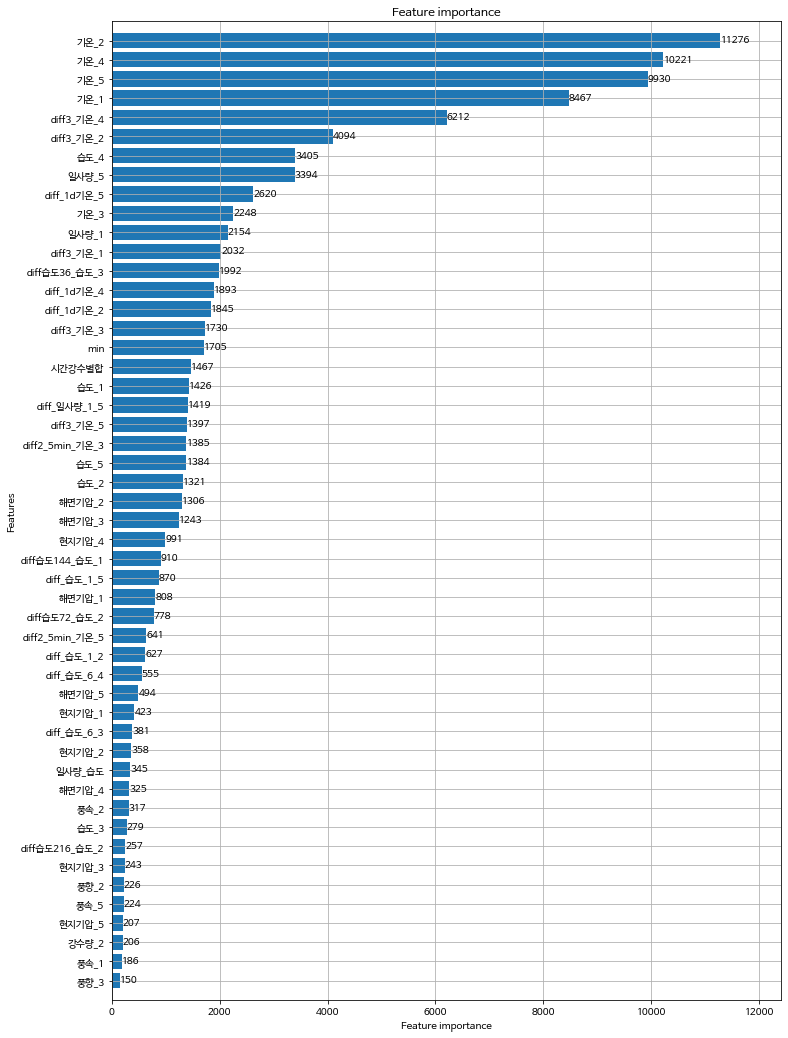

In [40]:
plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)

from matplotlib import pylab as plt

fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [41]:
y_test =  np.expm1(model.predict(X_test)) + 1

In [42]:
submission['Y18'] = y_test
submission.to_csv('data/Ensemble/col1_test.csv',index=False)

### COL2

In [43]:
X_train = data[COL2].iloc[:train.shape[0],:]
X_test = data[COL2].iloc[train.shape[0]:,:]

In [44]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

train_x, train_cv, y, y_cv = train_test_split(X_train,y_train, test_size=0.15, random_state=1217)

def lgbm_regressor(train_X, train_y, test_X, test_y, feature_names=None, seed_val=2284, num_rounds=18707):

    param = {}
    param['boosting'] = 'dart'
    param['objective'] = 'regression'
    param['learning_rate'] = 0.05
    param['max_depth'] = 10
    param['metric'] = 'rmse'
    param['is_training_metric'] = True
    param['min_child_weight'] = 1
    param['bagging_fraction'] = 0.8
    param['num_leaves'] = 128
    param['feature_fraction'] = 0.8
    param['bagging_freq'] = 6
    param['seed'] = seed_val
    param['min_split_gain'] = 0.01

    num_rounds = num_rounds

    plst = list(param.items())

    train_ds = lgb.Dataset(train_X, label=train_y)

    test_ds = lgb.Dataset(test_X, label=test_y)

    model = lgb.train(param, train_ds, num_rounds,test_ds, early_stopping_rounds=180)

    return model

model = lgbm_regressor(train_X = train_x, train_y = y, test_X = train_cv, test_y = y_cv)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[13708]	valid_0's rmse: 0.0307857
[13709]	valid_0's rmse: 0.0307857
[13710]	valid_0's rmse: 0.0307857
[13711]	valid_0's rmse: 0.0308569
[13712]	valid_0's rmse: 0.0309297
[13713]	valid_0's rmse: 0.0307441
[13714]	valid_0's rmse: 0.030801
[13715]	valid_0's rmse: 0.0308891
[13716]	valid_0's rmse: 0.0309726
[13717]	valid_0's rmse: 0.0307802
[13718]	valid_0's rmse: 0.0307802
[13719]	valid_0's rmse: 0.0308713
[13720]	valid_0's rmse: 0.0308713
[13721]	valid_0's rmse: 0.0308713
[13722]	valid_0's rmse: 0.0308713
[13723]	valid_0's rmse: 0.0309249
[13724]	valid_0's rmse: 0.0309249
[13725]	valid_0's rmse: 0.0309249
[13726]	valid_0's rmse: 0.0309249
[13727]	valid_0's rmse: 0.0310635
[13728]	valid_0's rmse: 0.0308634
[13729]	valid_0's rmse: 0.0306827
[13730]	valid_0's rmse: 0.0305134
[13731]	valid_0's rmse: 0.0305134
[13732]	valid_0's rmse: 0.030567
[13733]	valid_0's rmse: 0.030621
[13734]	valid_0's rmse: 0.0307057
[13735]	valid_0's rmse: 0.0305355
[13736]	valid_0

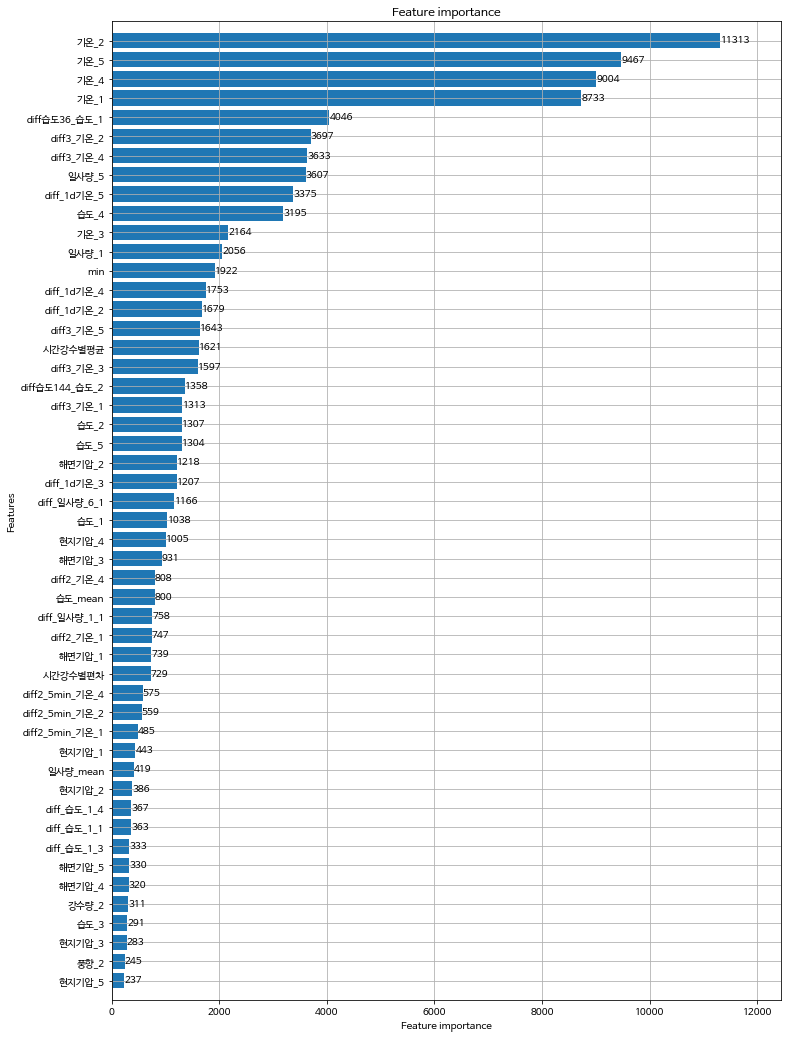

In [45]:
from matplotlib import pylab as plt

fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [46]:
y_test =  np.expm1(model.predict(X_test))+1

In [47]:
submission['Y18'] = y_test
submission.to_csv('data/Ensemble/col2_test.csv',index=False)

### COL3

In [54]:
X_train = data[COL3].iloc[:train.shape[0],:]
X_test = data[COL3].iloc[train.shape[0]:,:]

In [55]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

train_x, train_cv, y, y_cv = train_test_split(X_train,y_train, test_size=0.15, random_state=1217)

def lgbm_regressor(train_X, train_y, test_X, test_y, feature_names=None, seed_val=2284, num_rounds=18703):

    param = {}
    param['boosting'] = 'dart'
    param['objective'] = 'regression'
    param['learning_rate'] = 0.05
    param['max_depth'] = 10
    param['metric'] = 'rmse'
    param['is_training_metric'] = True
    param['min_child_weight'] = 1
    param['bagging_fraction'] = 0.8
    param['num_leaves'] = 128
    param['feature_fraction'] = 0.8
    param['bagging_freq'] = 6
    param['seed'] = seed_val
    param['min_split_gain'] = 0.01

    num_rounds = num_rounds

    plst = list(param.items())

    train_ds = lgb.Dataset(train_X, label=train_y)

    test_ds = lgb.Dataset(test_X, label=test_y)

    model = lgb.train(param, train_ds, num_rounds,test_ds, early_stopping_rounds=180)

    return model

model = lgbm_regressor(train_X = train_x, train_y = y, test_X = train_cv, test_y = y_cv)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[13704]	valid_0's rmse: 0.031096
[13705]	valid_0's rmse: 0.031096
[13706]	valid_0's rmse: 0.0311531
[13707]	valid_0's rmse: 0.031218
[13708]	valid_0's rmse: 0.031218
[13709]	valid_0's rmse: 0.0312909
[13710]	valid_0's rmse: 0.0310909
[13711]	valid_0's rmse: 0.0309114
[13712]	valid_0's rmse: 0.0309794
[13713]	valid_0's rmse: 0.0309794
[13714]	valid_0's rmse: 0.0310535
[13715]	valid_0's rmse: 0.0308777
[13716]	valid_0's rmse: 0.0308777
[13717]	valid_0's rmse: 0.0308777
[13718]	valid_0's rmse: 0.0309374
[13719]	valid_0's rmse: 0.0307659
[13720]	valid_0's rmse: 0.0308218
[13721]	valid_0's rmse: 0.0308218
[13722]	valid_0's rmse: 0.0308632
[13723]	valid_0's rmse: 0.0309189
[13724]	valid_0's rmse: 0.0309757
[13725]	valid_0's rmse: 0.0308046
[13726]	valid_0's rmse: 0.0306468
[13727]	valid_0's rmse: 0.0306978
[13728]	valid_0's rmse: 0.0307898
[13729]	valid_0's rmse: 0.0308489
[13730]	valid_0's rmse: 0.0309198
[13731]	valid_0's rmse: 0.0307543
[13732]	valid_0'

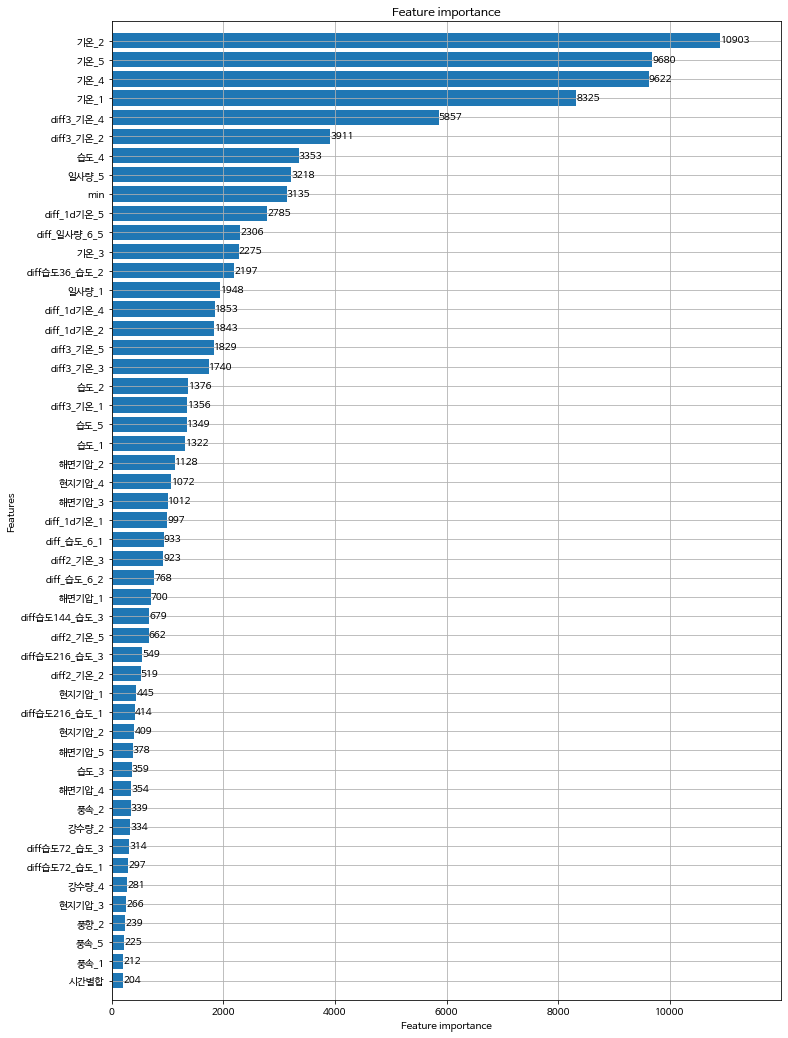

In [56]:
from matplotlib import pylab as plt

fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [57]:
y_test =  np.expm1(model.predict(X_test)) + 1

In [58]:
submission['Y18'] = y_test
submission.to_csv('data/Ensemble/col3_test.csv',index=False)

- COL1 ~ COL3까지의 멱평균을 진행

In [59]:
import pandas as pd
import numpy as np
import os

folder = 'data/Ensemble'
nf = 0
for Q in os.listdir(folder):
    ext = os.path.splitext(Q)[-1]
    if ext == '.csv': 
        s = pd.read_csv(folder+"/"+Q)
    else: 
        continue
    if len(s.columns) !=2:
        continue
    if nf == 0: 
        slist = s
    else: 
        slist = pd.merge(slist, s, on="id")
    nf += 1

p = 88.4  # 이 파라미터는 멱평균 앙상블에 있어 중요한 수치임. 최적의 수치를 찾기 바랍니다.   
if nf >= 2:
    pred_m = 0
    for J in range(nf): pred_m = pred_m + slist.iloc[:,J+1]**p 
    pred_m = pred_m / nf    
    pred_m = pred_m**(1/p)

    submit = pd.DataFrame({'id': slist.id, 'Y18': pred_m})
    fname = "data/submission_PM.csv"
    submit.fillna(0).to_csv(fname, index=False)

### COL4

In [60]:
COL4= ['기온_1', '현지기압_1', '풍속_1', '풍속_2', '강수량_1', '해면기압_1', '현지기압_2', '기온_2',
        '해면기압_2', '해면기압_3', '강수량_2', '일사량_1', '습도_1', '풍향_1', '일사량_2', '풍향_2',
        '일사량_3', '풍향_3', '풍속_3', '일사량_4', '습도_2', '강수량_3', '현지기압_3', '해면기압_4',
        '풍속_4', '풍향_4', '풍속_5', '현지기압_4', '기온_3', '현지기압_5', '습도_3', '기온_4',
        '기온_5', '해면기압_5', '일사량_5', '풍향_5', '강수량_4', '습도_4', '습도_5', '강수량_5',
        'min', '시간별합', '시간별평균', '시간별편차', 'rain', '시간강수별합', '시간강수별평균', '시간강수별편차',
        'time_cat_t1', 'time_cat_t2', 'time_cat_t3', 'time_cat_t4',
        'time_cat_t5', 'time_cat_t6', 'time_cat_t7', 'time_cat_t8',
        'time_cat_t9', 'diff_1d기온_1', 'diff_1d기온_2', 'diff_1d기온_3',
        'diff_1d기온_4', 'diff_1d기온_5', 'diff2_기온_1', 'diff2_기온_2', 'diff2_기온_3',
        'diff2_기온_4', 'diff2_기온_5', 'diff3_기온_1', 'diff3_기온_2', 'diff3_기온_3',
        'diff3_기온_4', 'diff3_기온_5', 'diff2_5min_기온_1', 'diff2_5min_기온_2',
        'diff2_5min_기온_3', 'diff2_5min_기온_4', 'diff2_5min_기온_5',
        'diff_습도_1_1', 'diff_습도_1_2', 'diff_습도_1_3', 'diff_습도_1_4',
        'diff_습도_1_5', 'diff_습도_6_1', 'diff_습도_6_2', 'diff_습도_6_3',
        'diff_습도_6_4', 'diff_습도_6_5', 'diff_일사량_1_1',
        'diff_일사량_1_2', 'diff_일사량_1_3', 'diff_일사량_1_4', 'diff_일사량_1_5',
        'diff_일사량_6_1', 'diff_일사량_6_2', 'diff_일사량_6_3', 'diff_일사량_6_4',
        'diff_일사량_6_5', '습도_mean', '일사량_mean', '일사량_습도']

In [61]:
X_train = data[COL4].iloc[:train.shape[0],:]
X_test = data[COL4].iloc[train.shape[0]:,:]

In [62]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

train_x, train_cv, y, y_cv = train_test_split(X_train,y_train, test_size=0.15, random_state=1217)

def lgbm_regressor(train_X, train_y, test_X, test_y, feature_names=None, seed_val=2284, num_rounds=18692):

    param = {}
    param['boosting'] = 'dart'
    param['objective'] = 'regression'
    param['learning_rate'] = 0.05
    param['max_depth'] = 10
    param['metric'] = 'rmse'
    param['is_training_metric'] = True
    param['min_child_weight'] = 1
    param['bagging_fraction'] = 0.8
    param['num_leaves'] = 128
    param['feature_fraction'] = 0.8
    param['bagging_freq'] = 6
    param['seed'] = seed_val
    param['min_split_gain'] = 0.01
    
    num_rounds = num_rounds

    plst = list(param.items())

    train_ds = lgb.Dataset(train_X, label=train_y)

    test_ds = lgb.Dataset(test_X, label=test_y)

    model = lgb.train(param, train_ds, num_rounds,test_ds, early_stopping_rounds=180)

    return model

model = lgbm_regressor(train_X = train_x, train_y = y, test_X = train_cv, test_y = y_cv)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[13693]	valid_0's rmse: 0.0308863
[13694]	valid_0's rmse: 0.0306586
[13695]	valid_0's rmse: 0.0304497
[13696]	valid_0's rmse: 0.0302595
[13697]	valid_0's rmse: 0.0302595
[13698]	valid_0's rmse: 0.0303346
[13699]	valid_0's rmse: 0.0303346
[13700]	valid_0's rmse: 0.0303801
[13701]	valid_0's rmse: 0.0304907
[13702]	valid_0's rmse: 0.0305469
[13703]	valid_0's rmse: 0.0306117
[13704]	valid_0's rmse: 0.0304081
[13705]	valid_0's rmse: 0.0304905
[13706]	valid_0's rmse: 0.0305614
[13707]	valid_0's rmse: 0.0306299
[13708]	valid_0's rmse: 0.0304205
[13709]	valid_0's rmse: 0.0302322
[13710]	valid_0's rmse: 0.0300608
[13711]	valid_0's rmse: 0.0301273
[13712]	valid_0's rmse: 0.029953
[13713]	valid_0's rmse: 0.0300102
[13714]	valid_0's rmse: 0.0300624
[13715]	valid_0's rmse: 0.0300624
[13716]	valid_0's rmse: 0.0301103
[13717]	valid_0's rmse: 0.0301103
[13718]	valid_0's rmse: 0.0301103
[13719]	valid_0's rmse: 0.0301754
[13720]	valid_0's rmse: 0.0301754
[13721]	valid

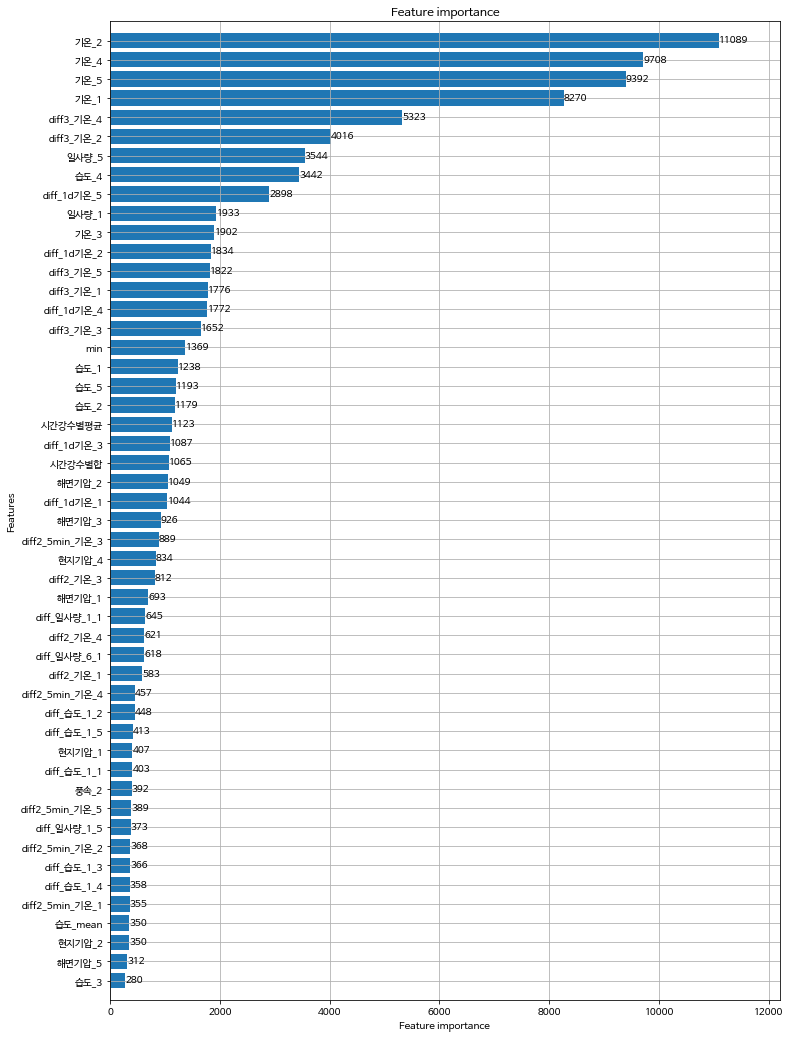

In [63]:
from matplotlib import pylab as plt

fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [64]:
y_test =  np.expm1(model.predict(X_test)) + 1

In [65]:
submission['Y18'] = y_test
submission.to_csv('data/0409_test.csv',index=False)

### COL5

In [66]:
COL5 =['기온_1', '풍속_1', '풍속_2', '강수량_1', '기온_2', '강수량_2', '일사량_1', '습도_1',
       '풍향_1', '일사량_2', '풍향_2', '일사량_3', '풍향_3', '풍속_3', '일사량_4', '습도_2',
       '강수량_3', '풍속_4', '풍향_4', '풍속_5', '기온_3', '습도_3', '기온_4', '기온_5',
       '일사량_5', '풍향_5', '강수량_4', '습도_4', '습도_5', '강수량_5', 'min', '시간별합',
       '시간별평균', '시간별편차', 'rain', '시간강수별합', '시간강수별평균', '시간강수별편차', 'time_cat_t1',
       'time_cat_t2', 'time_cat_t3', 'time_cat_t4', 'time_cat_t5',
       'time_cat_t6', 'time_cat_t7', 'time_cat_t8', 'time_cat_t9',
       'diff_36_기온_1', 'diff_72_기온_1', 'diff_144_기온_1', 'diff_216_기온_1',
       'diff_36_기온_2', 'diff_72_기온_2', 'diff_144_기온_2', 'diff_216_기온_2',
       'diff_36_기온_3', 'diff_72_기온_3', 'diff_144_기온_3', 'diff_216_기온_3',
       'diff_36_기온_4', 'diff_72_기온_4', 'diff_144_기온_4', 'diff_216_기온_4',
       'diff_36_기온_5', 'diff_72_기온_5', 'diff_144_기온_5', 'diff_216_기온_5',
       'diff_습도_1_1', 'diff_습도_1_2', 'diff_습도_1_3', 'diff_습도_1_4',
       'diff_습도_1_5', 'diff_습도_6_1', 'diff_습도_6_2', 'diff_습도_6_3',
       'diff_습도_6_4', 'diff_습도_6_5', 'diff_일사량_1_1', 'diff_일사량_1_2',
       'diff_일사량_1_3', 'diff_일사량_1_4', 'diff_일사량_1_5', 'diff_일사량_6_1',
       'diff_일사량_6_2', 'diff_일사량_6_3', 'diff_일사량_6_4', 'diff_일사량_6_5',
       '습도_mean', '일사량_mean', '일사량_습도']

In [67]:
X_train = data[COL5].iloc[:train.shape[0],:]
X_test = data[COL5].iloc[train.shape[0]:,:]

In [68]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

train_x, train_cv, y, y_cv = train_test_split(X_train,y_train, test_size=0.15, random_state=1217)

def lgbm_regressor(train_X, train_y, test_X, test_y, feature_names=None, seed_val=2284, num_rounds=18714):

    param = {}
    param['boosting'] = 'dart'
    param['objective'] = 'regression'
    param['learning_rate'] = 0.05
    param['max_depth'] = 10
    param['metric'] = 'rmse'
    param['is_training_metric'] = True
    param['min_child_weight'] = 1
    param['bagging_fraction'] = 0.8
    param['num_leaves'] = 128
    param['feature_fraction'] = 0.8
    param['bagging_freq'] = 6
    param['seed'] = seed_val
    param['min_split_gain'] = 0.01

    num_rounds = num_rounds

    plst = list(param.items())

    train_ds = lgb.Dataset(train_X, label=train_y)

    test_ds = lgb.Dataset(test_X, label=test_y)

    watchlist = [test_ds]

    model = lgb.train(param, train_ds, num_rounds,test_ds, early_stopping_rounds=180)

    return model

model = lgbm_regressor(train_X = train_x, train_y = y, test_X = train_cv, test_y = y_cv)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[13715]	valid_0's rmse: 0.0308192
[13716]	valid_0's rmse: 0.0306688
[13717]	valid_0's rmse: 0.0305206
[13718]	valid_0's rmse: 0.0305731
[13719]	valid_0's rmse: 0.0304458
[13720]	valid_0's rmse: 0.0303292
[13721]	valid_0's rmse: 0.0304114
[13722]	valid_0's rmse: 0.0304114
[13723]	valid_0's rmse: 0.0304114
[13724]	valid_0's rmse: 0.0304114
[13725]	valid_0's rmse: 0.0304114
[13726]	valid_0's rmse: 0.0304564
[13727]	valid_0's rmse: 0.0304564
[13728]	valid_0's rmse: 0.0304939
[13729]	valid_0's rmse: 0.0305335
[13730]	valid_0's rmse: 0.030616
[13731]	valid_0's rmse: 0.0306698
[13732]	valid_0's rmse: 0.0305325
[13733]	valid_0's rmse: 0.0305966
[13734]	valid_0's rmse: 0.030645
[13735]	valid_0's rmse: 0.030645
[13736]	valid_0's rmse: 0.030645
[13737]	valid_0's rmse: 0.030645
[13738]	valid_0's rmse: 0.0307131
[13739]	valid_0's rmse: 0.0307131
[13740]	valid_0's rmse: 0.0307867
[13741]	valid_0's rmse: 0.0308326
[13742]	valid_0's rmse: 0.0308326
[13743]	valid_0's

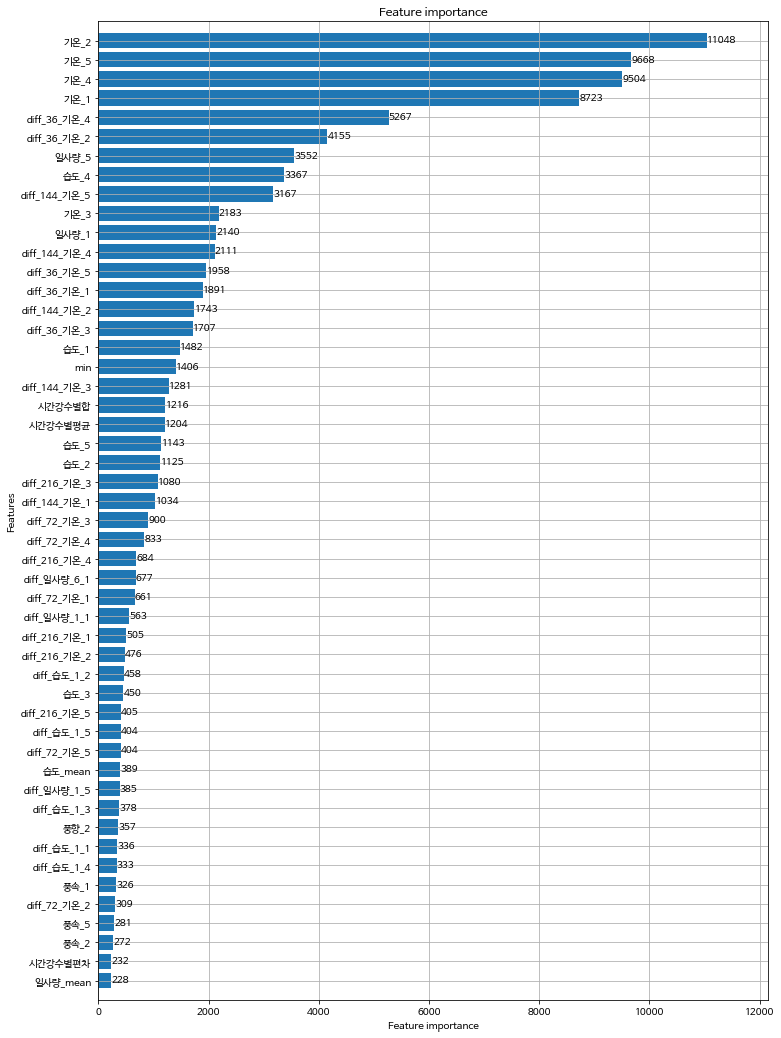

In [69]:
from matplotlib import pylab as plt

fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [70]:
y_test =  np.expm1(model.predict(X_test)) + 1

In [71]:
submission['Y18'] = y_test
submission.to_csv('data/0413_test.csv',index=False)

In [72]:
a = pd.read_csv('data/submission_PM.csv')['Y18']
b = pd.read_csv('data/0409_test.csv')['Y18']
c = pd.read_csv('data/0413_test.csv')['Y18']

In [73]:
w1 = 0.5
w2 = 0.1
w3 = 0.4

pd.DataFrame({'id': slist.id, 'Y18': (w1*a+w2*b+w3*c)}).to_csv('data/sanbest4_test.csv',index=False)